# K-Nearest Neighbors (KNN) Implementation 
----
This code allows you to select a school district and locate its K nearest neighbors. 
 

## Importing packages, lists, and functions 

Importing Necessary Packages 

In [32]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
from sklearn.manifold import MDS
from scipy.cluster.hierarchy import linkage, dendrogram
import geopandas as gpd
import textwrap
from matplotlib.patches import ConnectionPatch
from scipy.spatial import Voronoi

Importing demographic buckets from other .py file (lists containing relevant columns to run algorithm on) 

In [33]:
os.chdir(r"C:\Users\mmath\OneDrive\Desktop\Capstone\HERC_Sp25\4_Data_Modeling\4.2_KNN_Clustering")
from Demographic_Buckets import class_size_student_teacher_ratios
from Demographic_Buckets import student_mobility
from Demographic_Buckets import staff_demographics_experience
from Demographic_Buckets import race_ethnicity_percent
from Demographic_Buckets import economic_special_needs_percent
from Demographic_Buckets import language_education_percent
from Demographic_Buckets import gender_distribution_percent
from Demographic_Buckets import grade_level_percent
from Demographic_Buckets import special_populations_percent
from Demographic_Buckets import gifted_title1_percent
from Demographic_Buckets import district_identifiers

Importing functions from the .py file (containing all functions used for this analysis)

In [34]:
from KNN_Functions import calculate_missing_percentage
from KNN_Functions import find_nearest_districts
from KNN_Functions import plot_texas_districts
from KNN_Functions import plot_race_ethnicity_stacked_bar

## Reading in Data & Cleaning

Text(0.5, 1.0, 'Histogram of percentage of NA values in columns within demographic attributes')

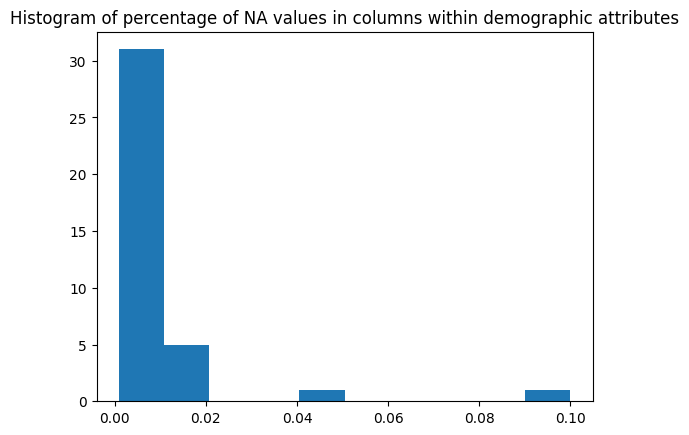

In [35]:
#Reading in the data
os.chdir(r"C:\Users\mmath\OneDrive\Desktop\Capstone\HERC_Sp25\4_Data_Modeling\4.2_KNN_Clustering")
df = pd.read_csv(r"C:\Users\mmath\OneDrive\Desktop\Capstone\HERC_Sp25\0_Datasets\1.7Master_Files\Individual Year Files_Take2\merged_2023.csv")
distgrad = pd.read_csv(r"C:\Users\mmath\OneDrive\Desktop\Capstone\HERC_Sp25\0_Datasets\1.6Data2023\District\clean_data\distgrad_2023_clean.csv")
distprof = pd.read_csv(r"C:\Users\mmath\OneDrive\Desktop\Capstone\HERC_Sp25\0_Datasets\1.6Data2023\District\clean_data\distprof_2023_clean.csv")
df = df[df['Charter School (Y/N)'] == 'N']
demographic_df = df[class_size_student_teacher_ratios + student_mobility + staff_demographics_experience + race_ethnicity_percent +
                    economic_special_needs_percent + language_education_percent + gender_distribution_percent + grade_level_percent +
                    special_populations_percent + district_identifiers]

plt.hist(calculate_missing_percentage(demographic_df) / 100)
plt.title("Histogram of percentage of NA values in columns within demographic attributes")


Key takaways, the demographic data contains very few columns with a lot of NAs! The outcome oriented data on the other hand varies slightly. Regardless, the data science portion (fitting a knn model) will occur on mostly complete data

### KNN FUNCTION 


## Fitting model on Houston ISD to find 5 nearest neighbors for different distance metrics
---
Target District: Houston ISD (101912)  
Feature buckets used:   
* class_size_student_teacher_ratios  
* race_ethnicity_percent  
* staff_demographics_experience   


Number of Neighbors: 5   
Imputation Strategy: Median  


Distance Metric: euclidean
      DISTRICT_id        DISTNAME
532        101912     HOUSTON ISD
285         57905      DALLAS ISD
1040       220905  FORT WORTH ISD
850        171901       DUMAS ISD
524        101902      ALDINE ISD
538        101919      SPRING ISD
418         84902   GALVESTON ISD
1037       220901   ARLINGTON ISD
1137       237902   HEMPSTEAD ISD
525        101903       ALIEF ISD


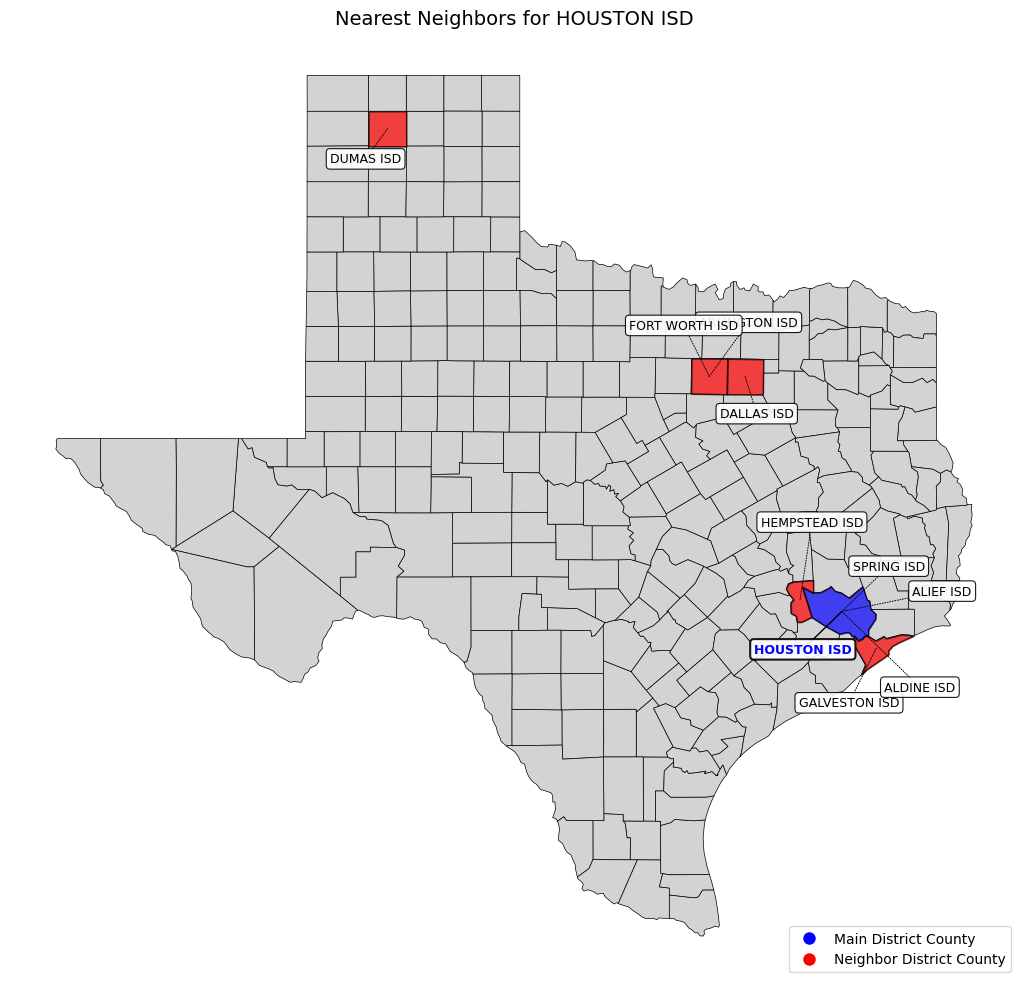

HOUSTON ISD


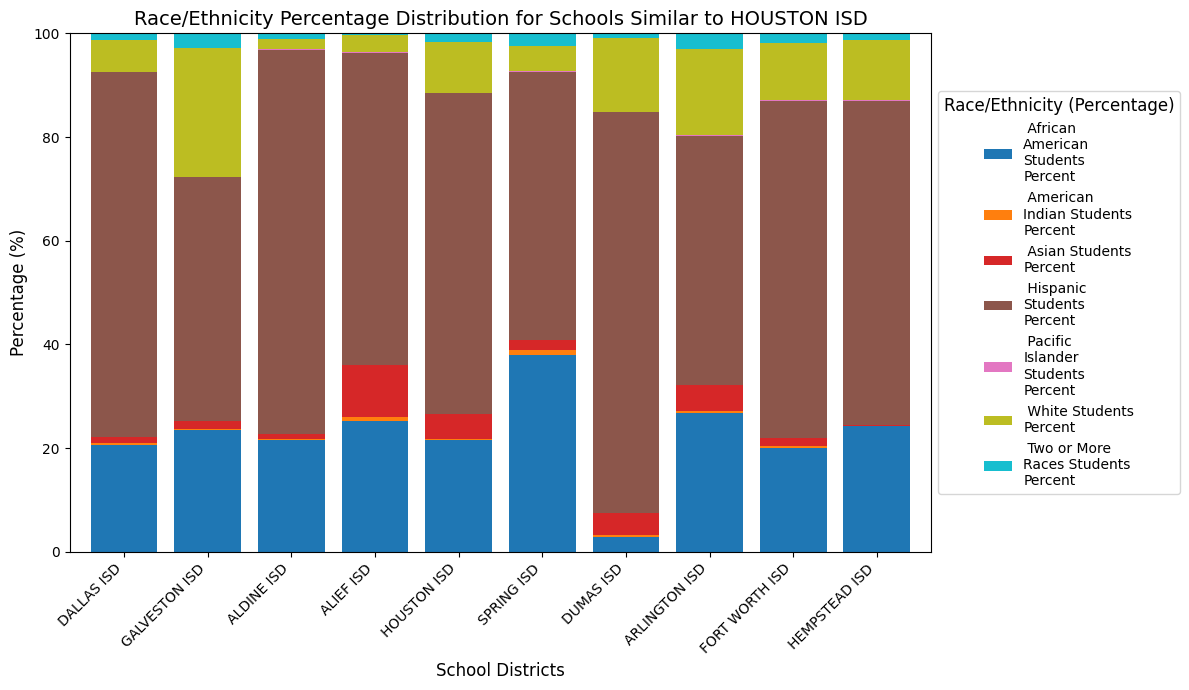

Distance Metric: manhattan
      DISTRICT_id                       DISTNAME
532        101912                    HOUSTON ISD
285         57905                     DALLAS ISD
1040       220905                 FORT WORTH ISD
418         84902                  GALVESTON ISD
850        171901                      DUMAS ISD
1037       220901                  ARLINGTON ISD
283         57903  CARROLLTON-FARMERS BRANCH ISD
538        101919                     SPRING ISD
340         68901               ECTOR COUNTY ISD
524        101902                     ALDINE ISD


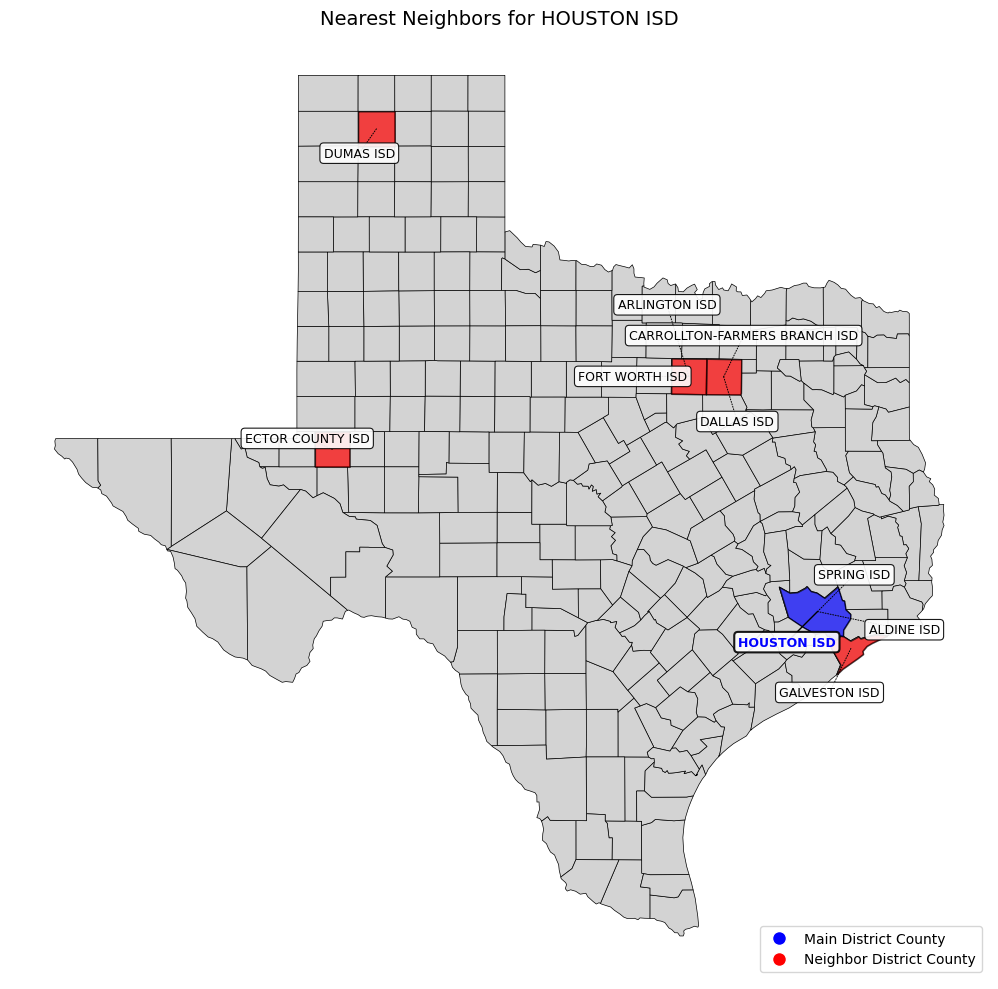

HOUSTON ISD


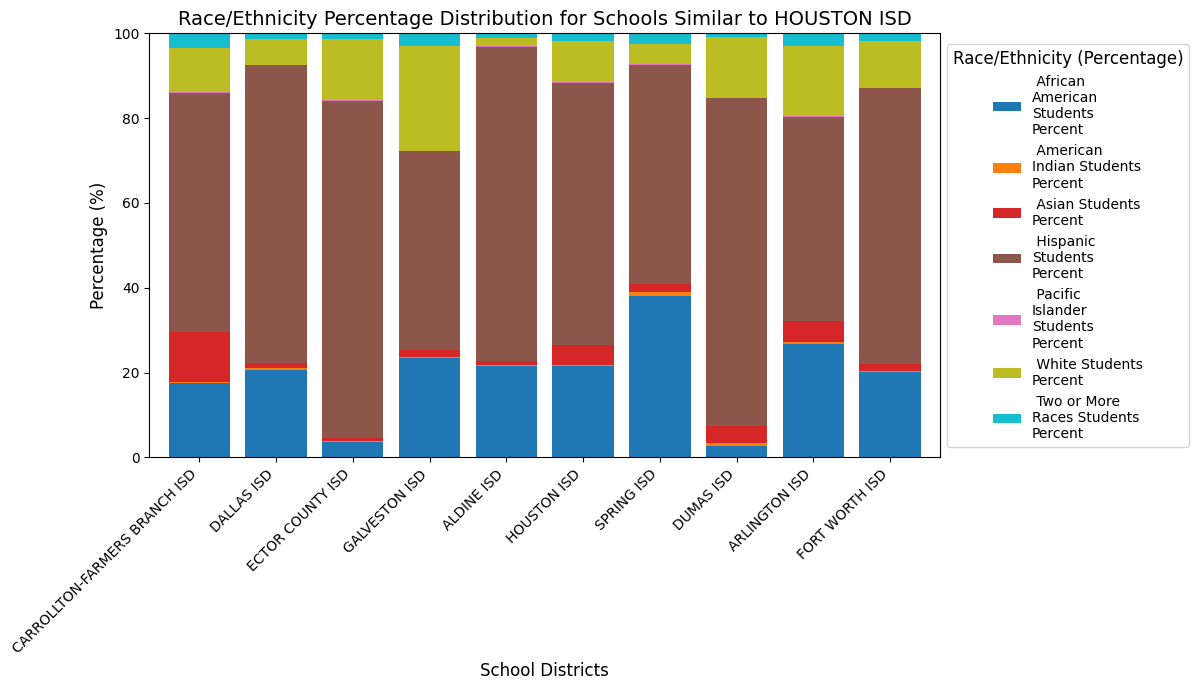

Distance Metric: mahalanobis
      DISTRICT_id               DISTNAME
532        101912            HOUSTON ISD
1040       220905         FORT WORTH ISD
418         84902          GALVESTON ISD
285         57905             DALLAS ISD
539        101920      SPRING BRANCH ISD
850        171901              DUMAS ISD
524        101902             ALDINE ISD
1037       220901          ARLINGTON ISD
538        101919             SPRING ISD
528        101907  CYPRESS-FAIRBANKS ISD


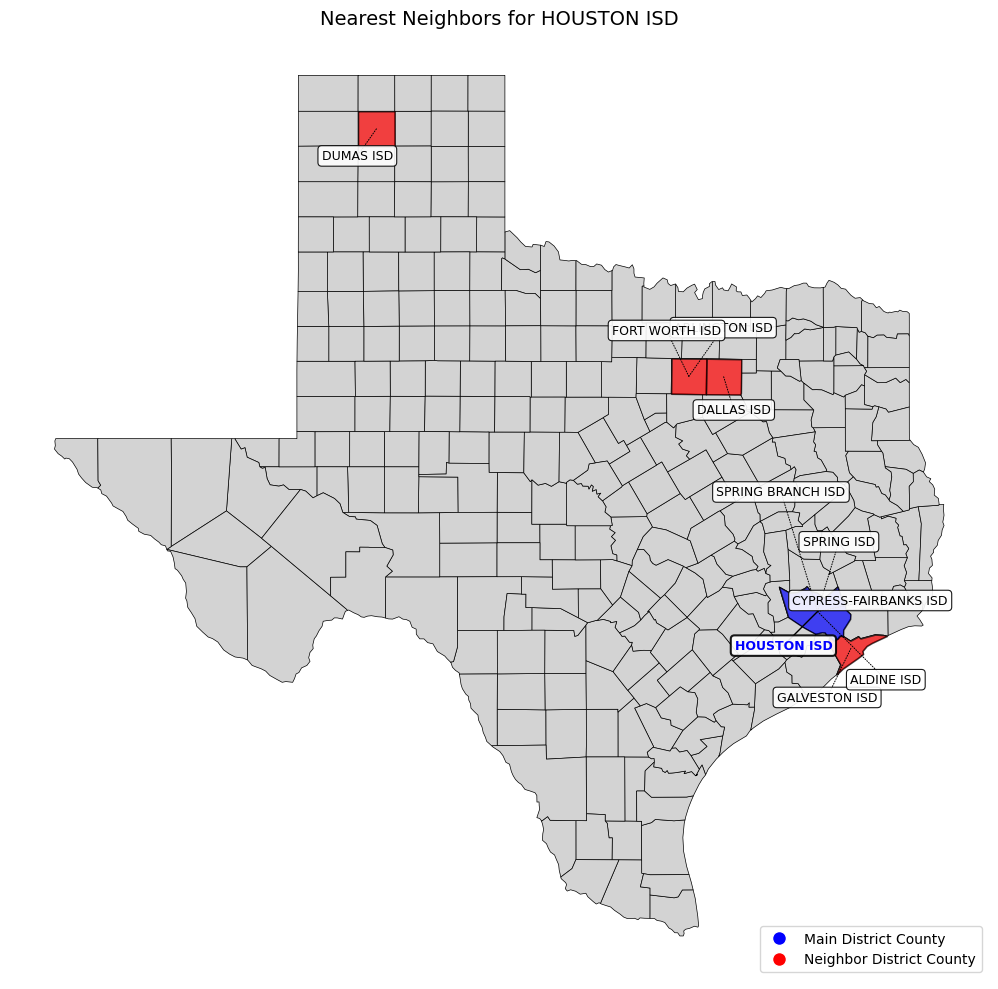

HOUSTON ISD


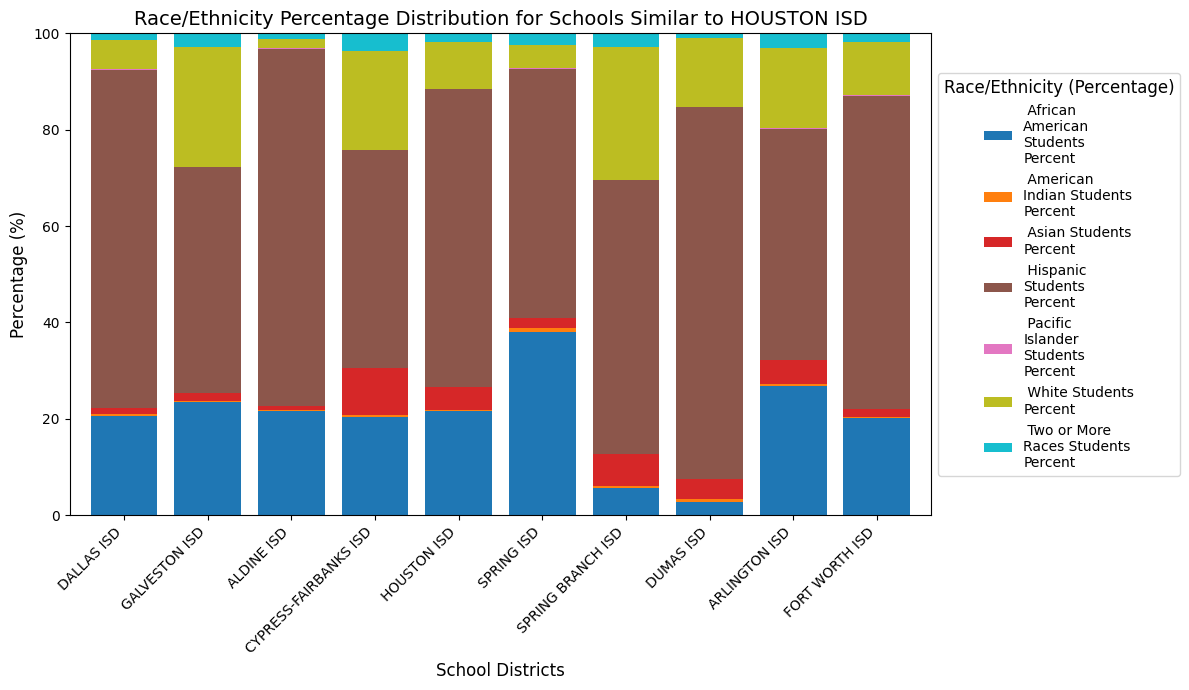

Distance Metric: cosine
      DISTRICT_id           DISTNAME
532        101912        HOUSTON ISD
285         57905         DALLAS ISD
1040       220905     FORT WORTH ISD
289         57910  GRAND PRAIRIE ISD
1137       237902      HEMPSTEAD ISD
1151       241904        WHARTON ISD
293         57914       MESQUITE ISD
541        101924        SHELDON ISD
783        158901       BAY CITY ISD
1139       237905          ROYAL ISD


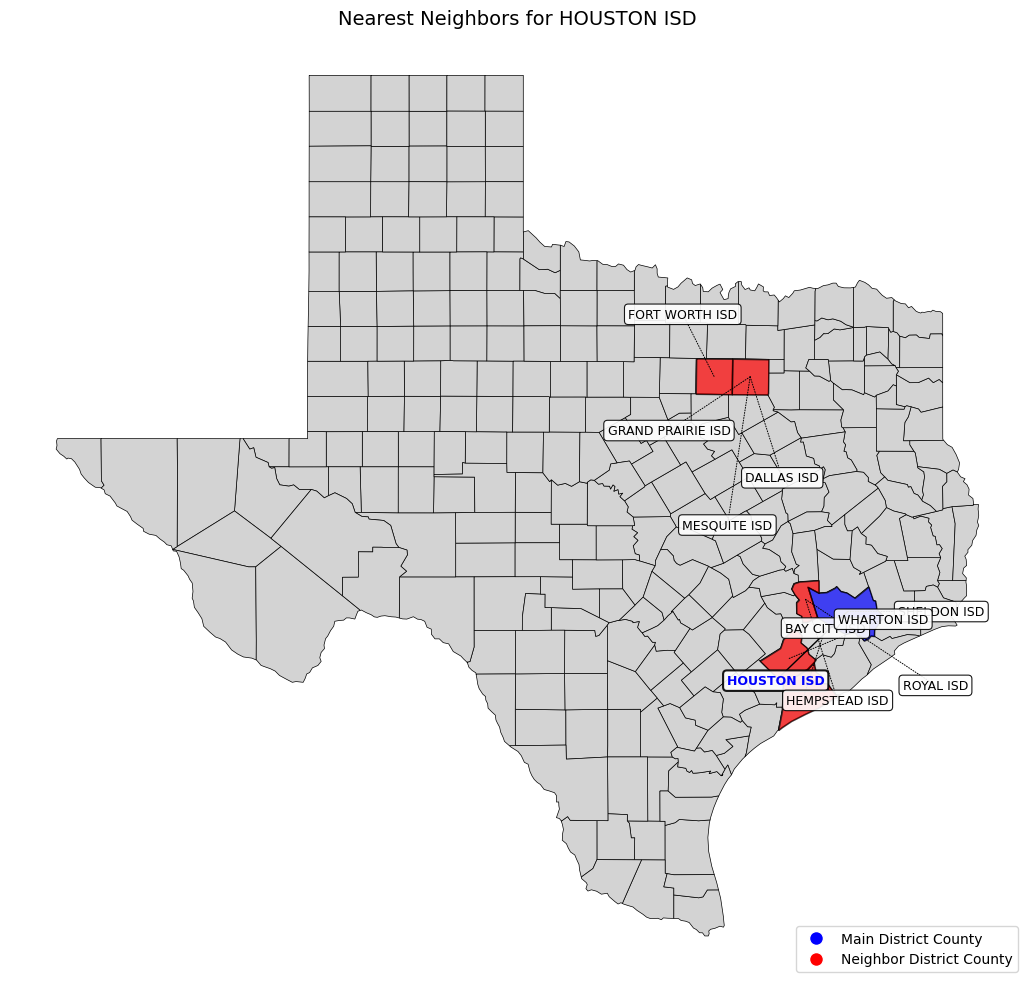

HOUSTON ISD


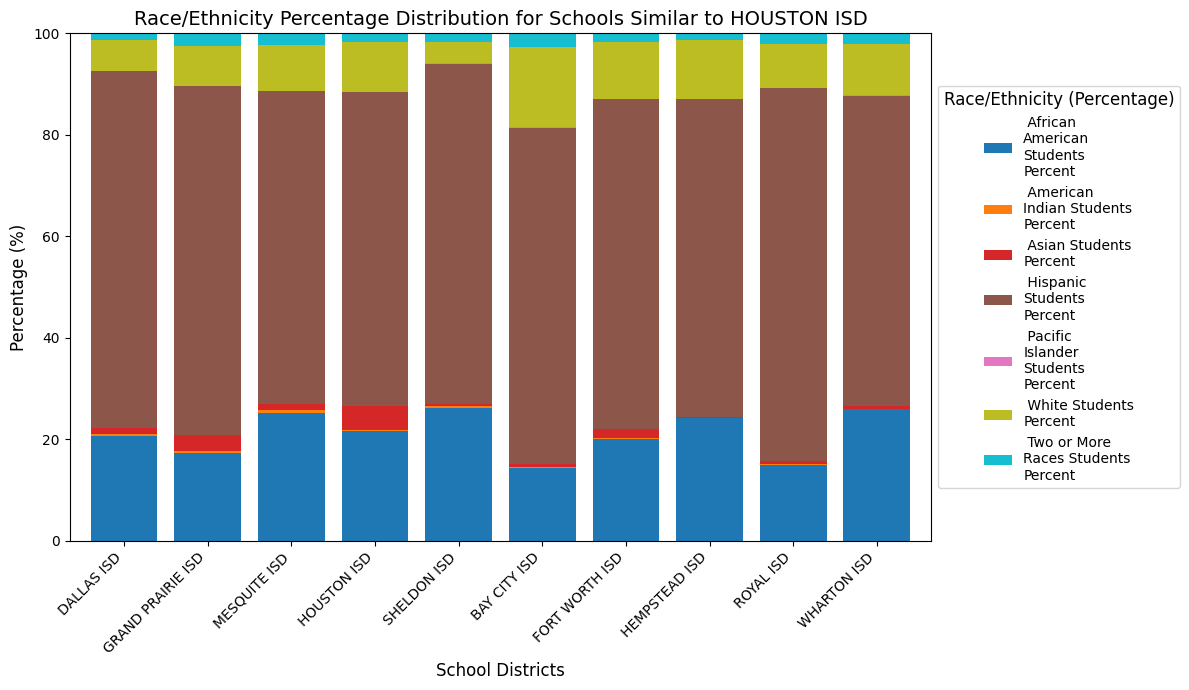

Distance Metric: canberra
      DISTRICT_id                       DISTNAME
532        101912                    HOUSTON ISD
1040       220905                 FORT WORTH ISD
665        123910                   BEAUMONT ISD
1093       227907                      MANOR ISD
285         57905                     DALLAS ISD
1151       241904                    WHARTON ISD
283         57903  CARROLLTON-FARMERS BRANCH ISD
537        101917                   PASADENA ISD
289         57910              GRAND PRAIRIE ISD
418         84902                  GALVESTON ISD


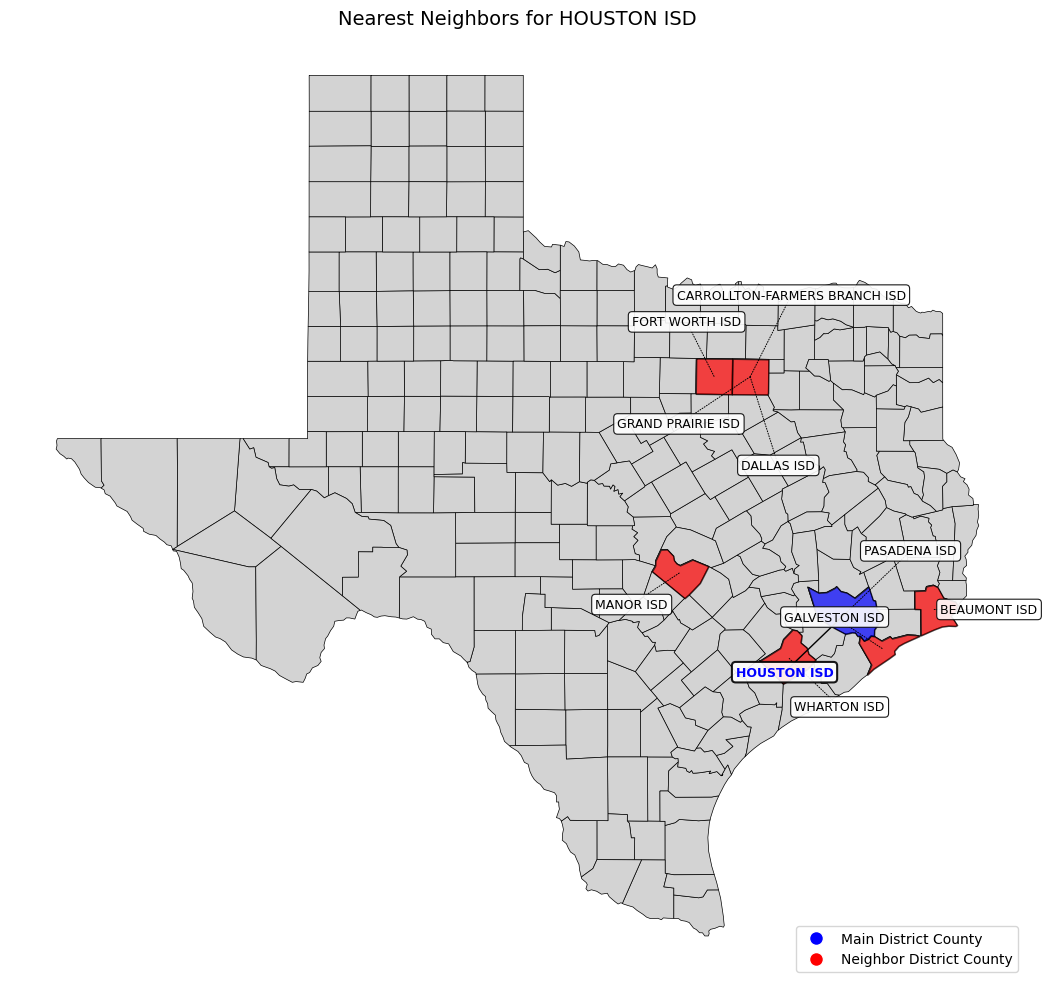

HOUSTON ISD


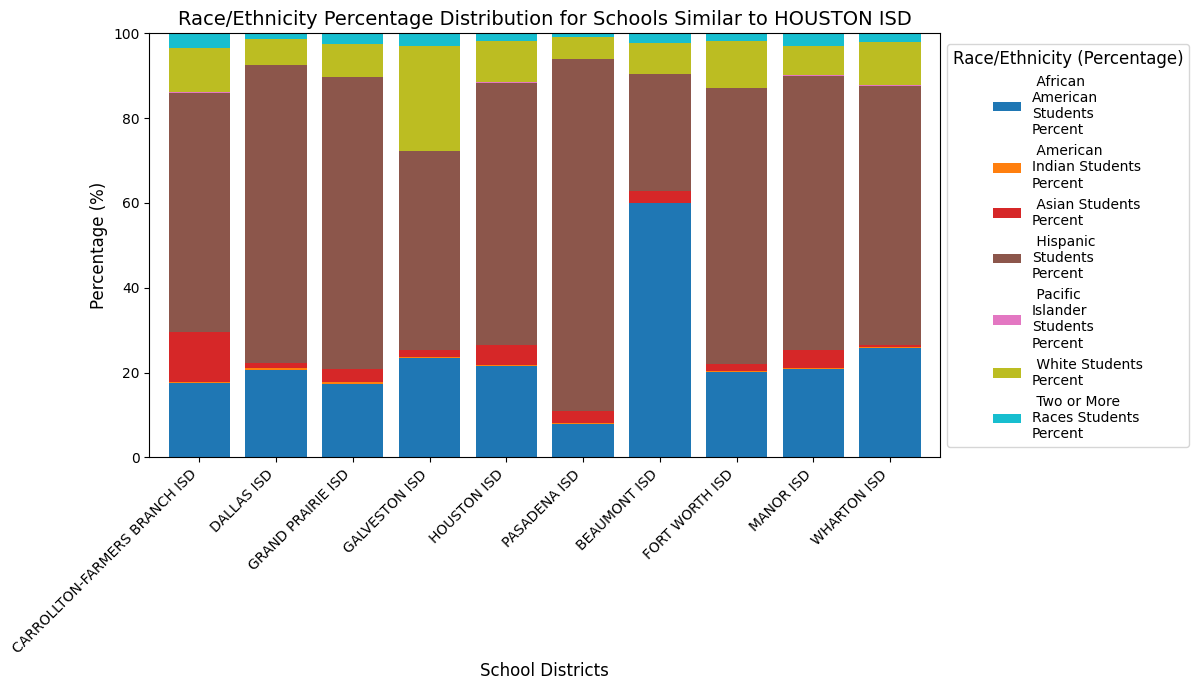

In [36]:
distance_metrics = ['euclidean', 'manhattan', 'mahalanobis', 'cosine', 'canberra']
selected_features = race_ethnicity_percent + economic_special_needs_percent + grade_level_percent + special_populations_percent

for distance_metric in distance_metrics: 
    print(f"Distance Metric: {distance_metric}")
    knn_model = find_nearest_districts(df, 101912, selected_features, 10, distance_metric, "median")
    print(knn_model)
    plot_texas_districts(knn_model, df)
    plot_race_ethnicity_stacked_bar(knn_model, df)
    